# **Team A**

# **US Health Insurance**

## **Introduction**

In this project, we will be working on a health insurance dataset. The dataset contains 1338 samples with 7 variables (Age, Sex, BMI, Number of Children, Smoker, Region, and Medical Costs). This dataset has only been on Kaggle for one month and there have been two contributors who implemented correlation matrices and did exploratory data analysis with various visualization methods (box plots, histograms, pie chart, violin plot, etc.). We hope to further this analysis by implementing deep neural networks to create a better predictive model for Medical Costs given the independent variables.

## **Link to the dataset**

https://www.kaggle.com/teertha/ushealthinsurancedataset

## **Read the File**

In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
link = 'https://drive.google.com/open?id=1-2r2qIBET-4JzV_PaH6plAPttoeTBB4l'

fluff, id = link.split('=')
print (id)

downloaded = drive.CreateFile({'id':id})

downloaded.GetContentFile('insurance.csv')  

#3. Read file as panda dataframe
import pandas as pd
xyz = pd.read_csv('insurance.csv')
xyz

1-2r2qIBET-4JzV_PaH6plAPttoeTBB4l


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
#changing sex into binary values and changing category name from sex to male in order to easier interpret (1 TRUE) and (0 False)
xyz.sex[xyz.sex =='male'] = 1
xyz.sex[xyz.sex =='female'] = 0
xyz = xyz.rename(columns={'sex':'male'})
xyz

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,male,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [3]:
#changing smoking to binary values
xyz.smoker[xyz.smoker=='yes']=1
xyz.smoker[xyz.smoker=='no']=0
xyz

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,male,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [4]:
#change region values to numerical
xyz.region.value_counts()
xyz.region[xyz.region=='southeast']=1
xyz.region[xyz.region=='southwest']=2
xyz.region[xyz.region=='northeast']=3
xyz.region[xyz.region=='northwest']=4
xyz

#we will need to use OneHotEcoding so that these values scale properly




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,age,male,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,4,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


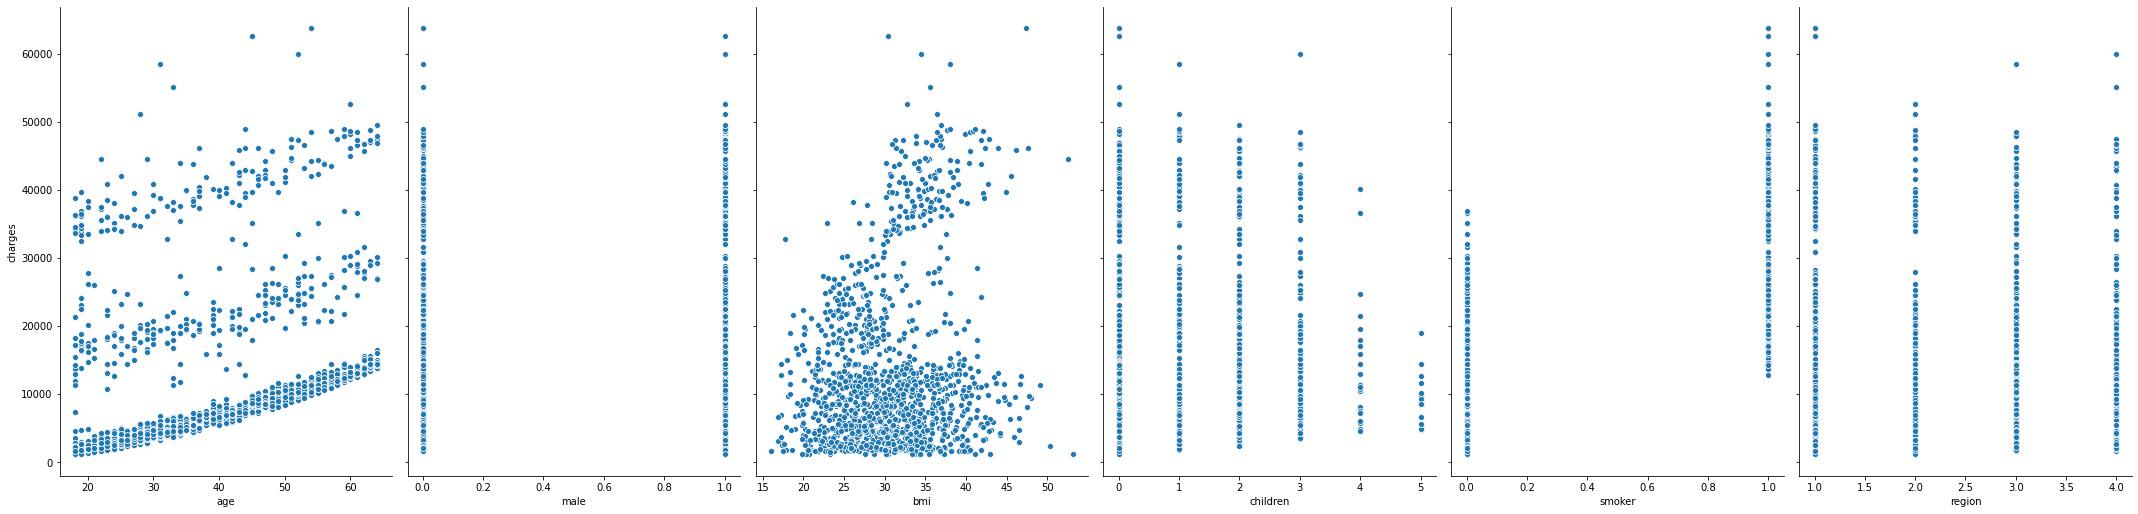

In [5]:
import seaborn as sns
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(xyz, x_vars=['age','male','bmi','children','smoker','region'], y_vars='charges', height=7, aspect=0.7)

In [6]:
#Regression - we will not include region for now
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
feature_cols = ['age', 'male','bmi','children','smoker']
mlr.fit(xyz[feature_cols], xyz['charges'])
print(mlr.intercept_)

#pair the feature names with the coefficients
list(zip(feature_cols, mlr.coef_))

#charges = -12052.462 + 257.735*age - 128.64*male + 322.36*bmi + 474.41*children +  23823.393*smoker

-12052.461985664719


[('age', 257.73498766924484),
 ('male', -128.6398535697067),
 ('bmi', 322.3642144860736),
 ('children', 474.4111206126902),
 ('smoker', 23823.39253065261)]

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
#use test/train split with RMSE to see whether Male should be kept in the MLR model
X = xyz[['age', 'male','bmi','children','smoker']]
y = xyz.charges

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm = LinearRegression()

# Fit Model
lm.fit(X_train, y_train)

# Predict
y_pred = lm.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#RMSE = 6009.8


6009.798666772751


In [8]:
#exclude male
X = xyz[['age', 'bmi','children','smoker']]
y = xyz.charges

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm = LinearRegression()

# Fit Model
lm.fit(X_train, y_train)

# Predict
y_pred = lm.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


#RMSE = 6005.93


6005.930711849331


In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
559,1646.42970,4396.357782
1087,11353.22760,12751.975535
1020,8798.59300,12920.389852
460,10381.47870,13371.376809
802,2103.08000,1182.213794
...,...,...
1192,13019.16105,13624.025322
628,11365.95200,14993.992190
1098,23045.56616,11286.011849
1038,2250.83520,3104.723761


In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4016.567253739944


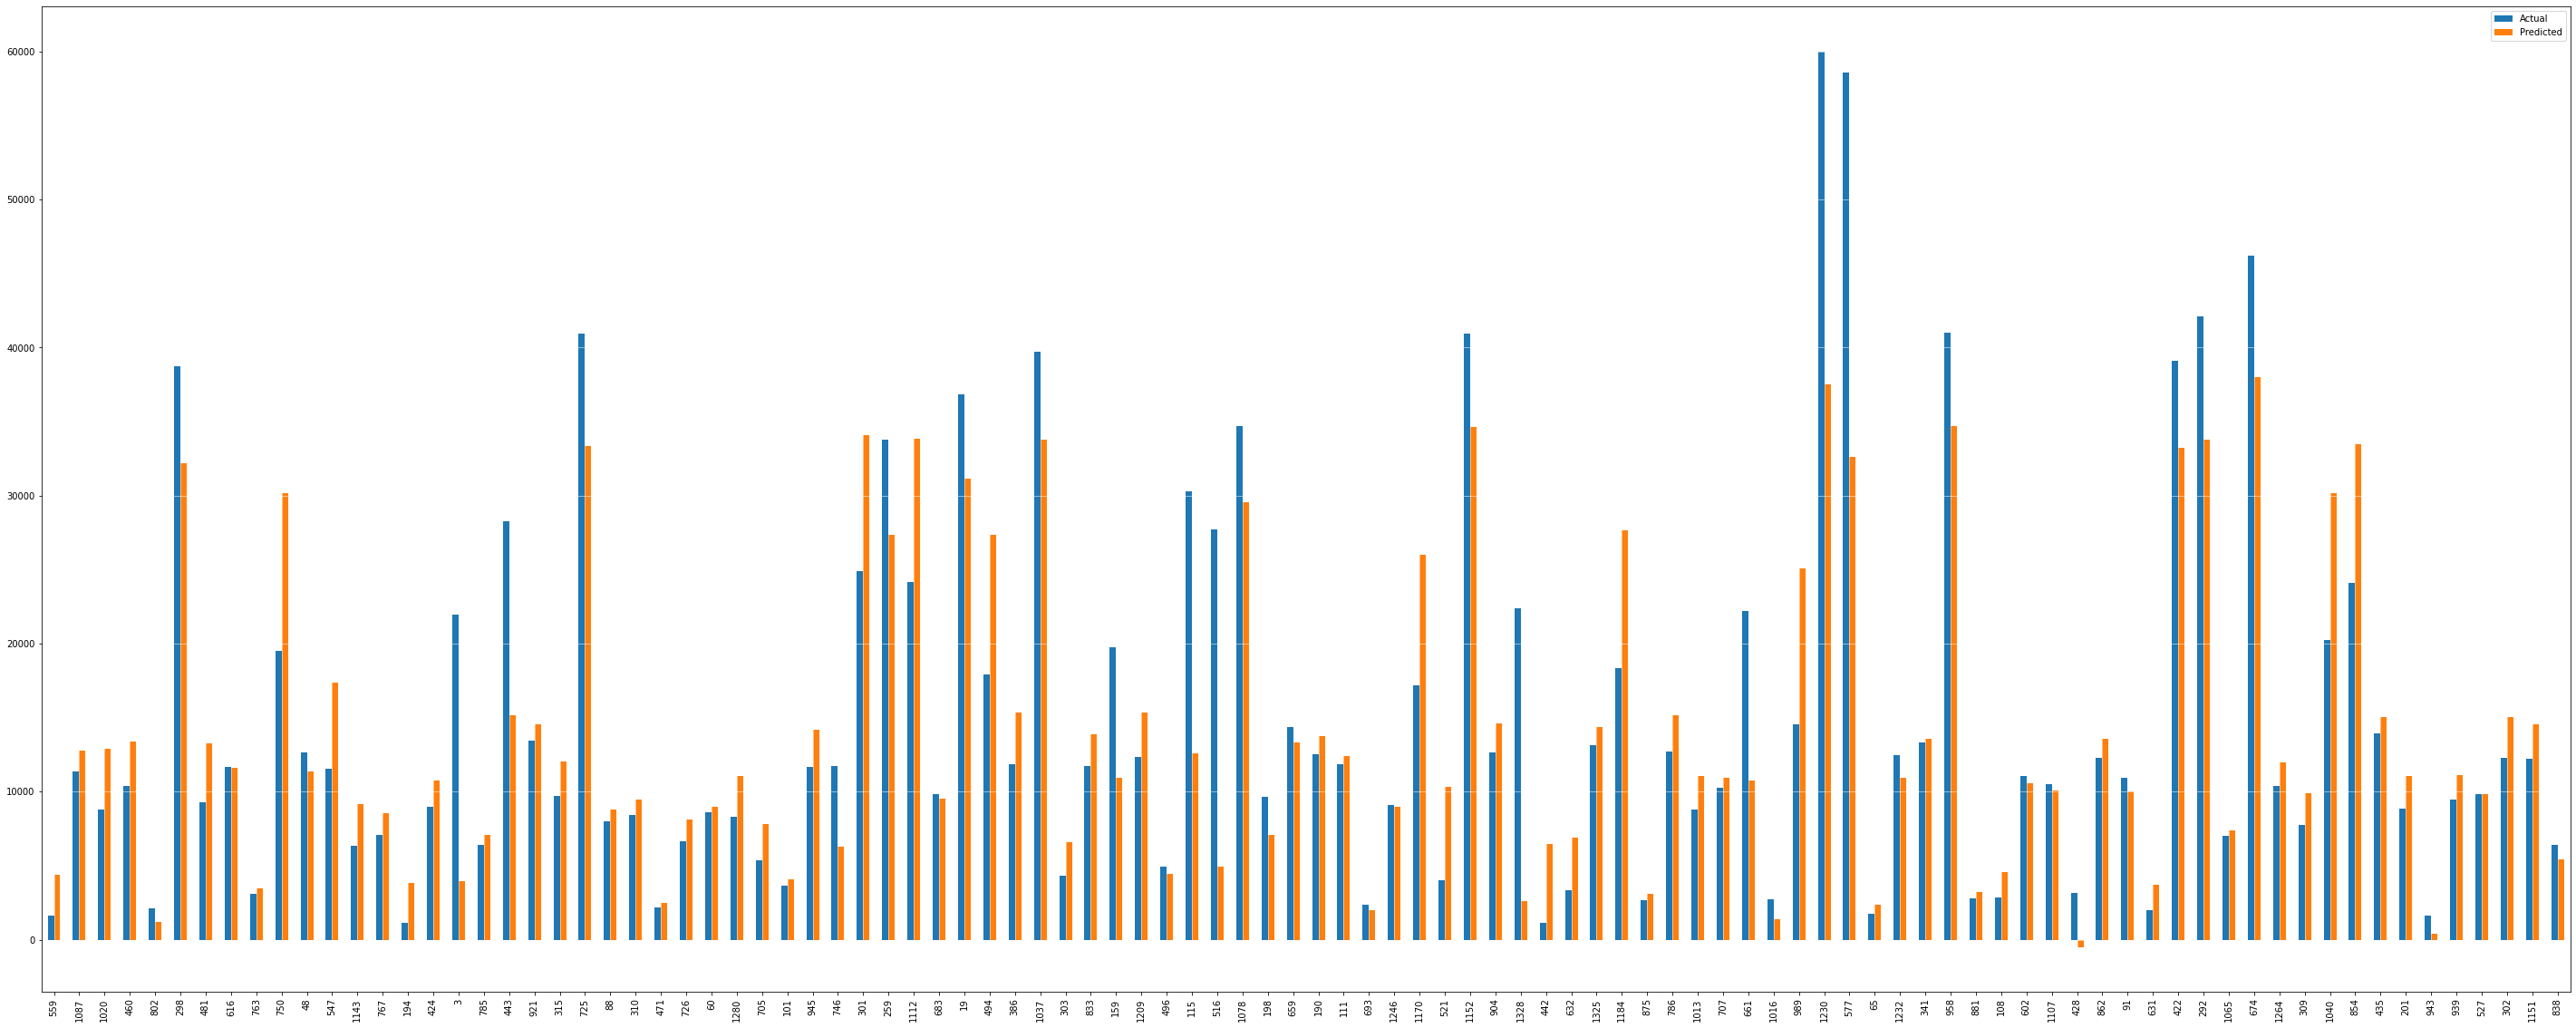

In [11]:
import matplotlib.pyplot as plt 
df1 = df.head(100)
df1.plot(kind='bar',figsize=(50,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
#RMSE from new model without male
#if any other variable is removed RMSE increases, therefore our model is most accurate with age, bmi, children, and smoker

In [12]:
from sklearn.linear_model import LinearRegression
mlr2 = LinearRegression()
feature_cols = ['age','bmi','children','smoker']
mlr2.fit(xyz[feature_cols], xyz['charges'])
print(mlr2.intercept_)
list(zip(feature_cols, mlr2.coef_))

-12102.7693627279


[('age', 257.8495072765737),
 ('bmi', 321.8514024653413),
 ('children', 473.50231561375625),
 ('smoker', 23811.39984460182)]

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

#scaling/normalizing features 
y=np.array(xyz.charges)
y=np.reshape(y, (-1,1))
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_X.fit(X))
xscale=scaler_X.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
#splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [15]:
#To train the neural network, we will use 4 input variables (age, bmi, children, smoker)
model = Sequential()
model.add(Dense(12, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [0]:
 #80% of training data used to test the model with 150 epochs
 history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


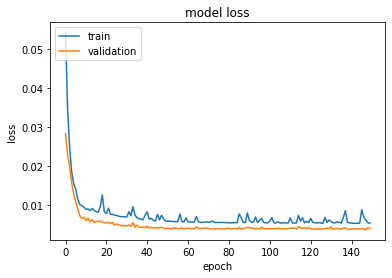

In [17]:
#visualizing how much training and validation loss decreased. Exponential decrease indicates the number of epochs used has allowed high accuracy 
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
y_pred = model.predict(X_test)
nndf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
nndf

,Actual,Predicted
0,0.057854,0.097474
1,0.177218,0.192499
2,0.022547,0.042129
3,0.580422,0.599414
4,0.560229,0.588260
...,...,...
330,0.037710,0.078407
331,0.148211,0.186296
332,0.090337,0.114037
333,0.114618,0.136240


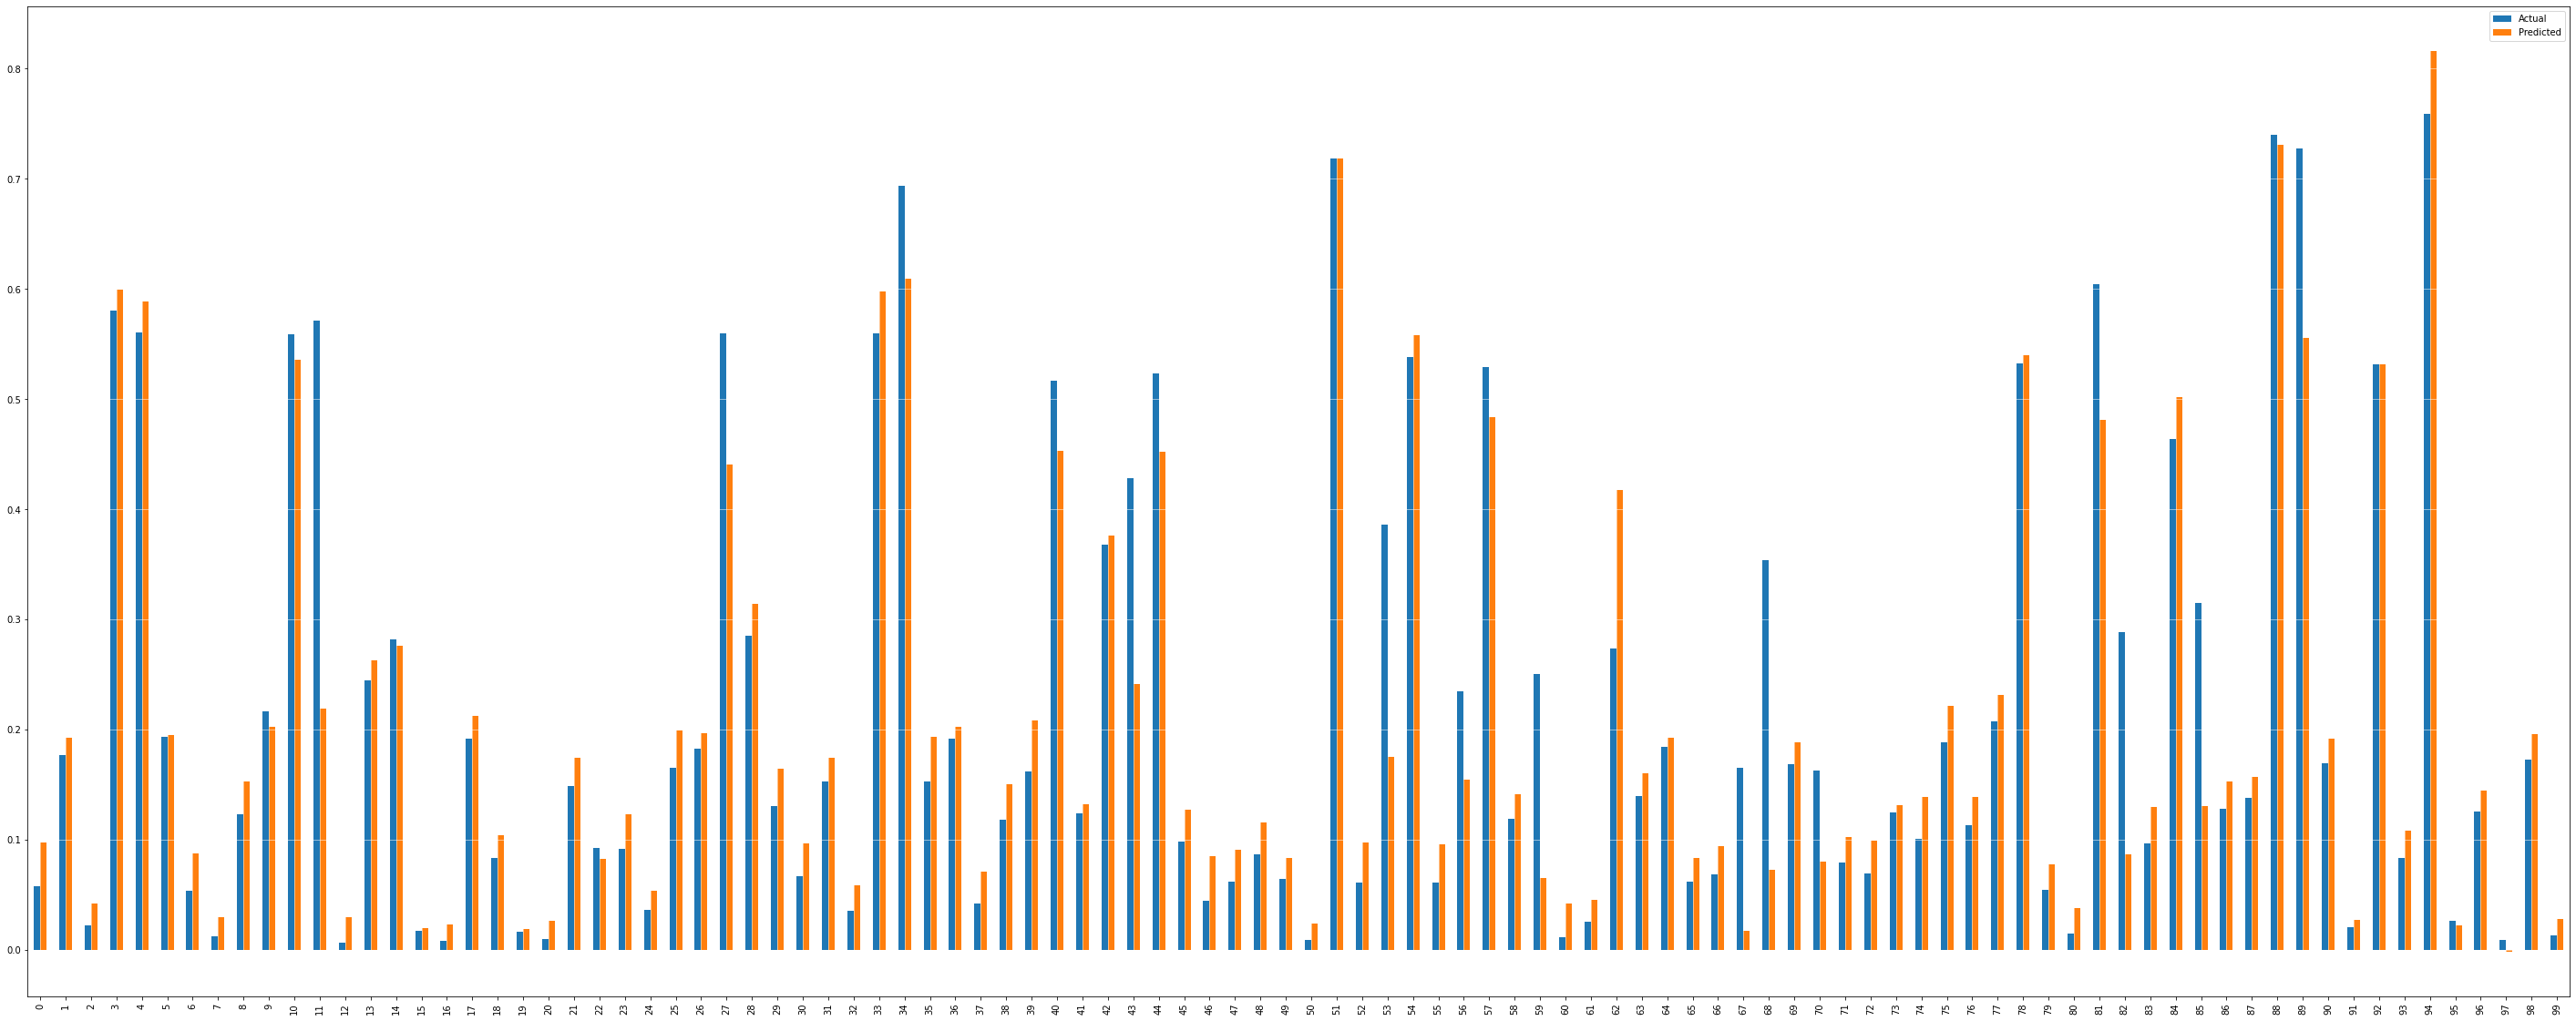

In [19]:
nndf1 = nndf.head(100)
nndf1.plot(kind='bar',figsize=(50,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
#Let's predict data using both linear regression and neural network model on {3} random rows of our dataset
np.random.randint(low=0,high=1337)
#505, 571, 739
xyz.loc[505,:] 
actual_charges1 = 6796.86
def linregcharges(age,bmi,children,smoker):
    charges = -12102.77 + 257.85*age + 321.85*bmi + 473.5*children + 23811.4*smoker
    return charges
linregpred1=linregcharges(37,30.875,3,0)
diff_1 = actual_charges1-linregpred1
print(diff_1)


-1998.438750000002


In [23]:
Xnew = np.array([[37,30.875,3,0]])
Xnew= scaler_X.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_X.inverse_transform(Xnew)
ynew[0]
nndiff_1 = actual_charges1 - ynew[0]
print(nndiff_1)

[-2295.025]


In [21]:
xyz.loc[571,:]

age              18
male              0
bmi           37.29
children          1
smoker            0
region            1
charges     2219.45
Name: 571, dtype: object